# Aim : Applying AutoEncoder on MNIST Dataset

In [1]:
from keras import layers
from keras.datasets import mnist
import keras 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Latent Representation of size 32 

encoding_dim = 32

In [3]:
input_img = keras.Input(shape=(784,))

In [4]:
# Encoder 

encoded = layers.Dense(encoding_dim, activation = "relu")(input_img)

In [5]:
# Decoder 

decoded = layers.Dense(784, activation = "sigmoid")(encoded)

In [6]:
autoencoder = keras.Model(input_img, decoded)

In [7]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))

In [8]:
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [9]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [10]:
(xtrain,_),(xtest,_)=mnist.load_data()

In [11]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

In [12]:
xtrain.shape

(60000, 28, 28)

In [13]:
xtest.shape

(10000, 28, 28)

In [14]:
xtrain = xtrain.reshape((len(xtrain),np.prod(xtrain.shape[1:])))
xtrain.shape

(60000, 784)

In [15]:
xtest = xtest.reshape((len(xtest),np.prod(xtest.shape[1:])))
xtest.shape

(10000, 784)

In [16]:
autoencoder.fit(xtrain,xtrain,epochs=50,batch_size=256,validation_data=(xtest,xtest))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2757 - val_loss: 0.1847
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1675 - val_loss: 0.1514
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1431 - val_loss: 0.1332
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1284 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1183 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1110 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1059 - val_loss: 0.1026
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0997 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0978 - val_loss: 0.0957

In [17]:
encoded_imgs = encoder.predict(xtest)

313/313 [==============================] - 0s 511us/step


In [18]:
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 547us/step


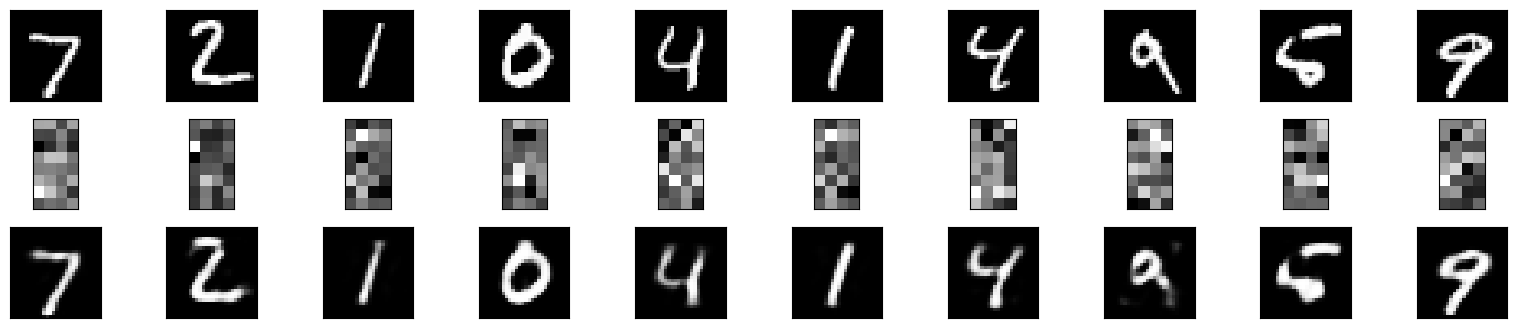

In [19]:
n=10
plt.figure(figsize=(40,4))
for i in range(10):
    ax=plt.subplot(3,20,i+1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(3,20,i+1+20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(3,20,2*20+i+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)